### Propensity Score Matching with psmpy

#### 1. Read in data

This notebook uses a sample dataset of England & Wales Census 2021 variables for the Metropolitan County and Police Force Area of Merseyside England.

The dataset includes columns:

* index
* census_code (this is Lower Super Ouput Area code 2021)
* DistrictCode (this is the Local Authority District Code 2024)
* deprivation rate (ranking, 1 is most deprived, 0 least deprived)
* population_density (persons per ha)
* economically_active_percent
* ethnicity_non_white_percent
* born_uk_percent
* managerial_profession_percent
* no_qualifications_percent
* treatment (1 = Clear Hold Build proxy area, 0 = rest of LSOAs in Merseyside)
* residents (number of)
* ec_active (number of people economically active - employed, pt ft or self)
* non_white (number of residents)
* manager (number of occupation groups in managerial, professional and technical roles)
* no_qualifications (number of people without any qualifications)
* unemployed (number of people unemployed)

Dataset is saved at on my Github. 

In [6]:
import pandas as pd
url = 'https://github.com/routineactivity/adhoc_notebooks/blob/main/chb_psm_scm/data/df_psm.csv?raw=true'
df_psm = pd.read_csv(url)

In [7]:
# view all cols
df_psm.columns

Index(['index', 'census_code', 'DistrictCode', 'deprivation_rate',
       'population_density', 'economically_active_percent',
       'ethnicity_non_white_percent', 'born_uk_percent',
       'managerial_profession_percent', 'no_qualifications_percent',
       'treatment', 'residents', 'ec_active', 'non_white', 'manager',
       'no_qualifications', 'unemployed'],
      dtype='object')

In [8]:
# copy columns we need
df = df_psm[['index', 'treatment', 'residents', 'ec_active', 'non_white', 'manager',
       'no_qualifications', 'unemployed']].copy()

In [9]:
df.head()

,index,treatment,residents,ec_active,non_white,manager,no_qualifications,unemployed
0,0,1,1432,612,110,188,370,33
1,1,1,1262,486,81,128,329,38
2,2,1,1527,642,73,188,441,33
3,3,1,1805,763,149,189,380,57
4,4,1,1651,727,95,188,323,69


#### 2. Read in psmpy 

The following section uses the workflow as it appears in the psmpy documentation. This can be found here: https://pypi.org/project/psmpy/ 

In [20]:
# import relevant libraries
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
sns.set(rc={'figure.figsize':(6,6)}, font_scale = 1.3)

#### 3. Set up the data

In [21]:
# set the dataframe, treatment column and index column - should be integer, and initialize the class
psm = PsmPy(df, treatment='treatment', indx='index', exclude = [])

# calculate logit/ps scores
psm.logistic_ps(balance = False)

# view the raw values
psm.predicted_data

,index,residents,ec_active,non_white,manager,no_qualifications,unemployed,propensity_score,propensity_logit,treatment
0,14,2066,601,791,126,484,116,0.000020,-10.827518,0
1,15,1345,517,85,145,356,45,0.030126,-3.471767,0
2,16,1680,706,138,174,315,44,0.014982,-4.185800,0
3,17,1221,480,65,126,294,39,0.052479,-2.893430,0
4,18,1522,601,40,151,438,42,0.051781,-2.907554,0
...,...,...,...,...,...,...,...,...,...,...
918,9,1337,611,27,134,334,68,0.059384,-2.762508,1
919,10,1238,618,23,197,264,32,0.033216,-3.370933,1
920,11,1648,625,64,158,365,44,0.031662,-3.420476,1
921,12,1373,555,64,221,226,22,0.011104,-4.489260,1


#### 4. Matching algorithms

There are options of k-nearest neighbour (knn) and knn one-to-many.

In this example, we're finding the 5 nearest matching LSOAs to our treatment LSOAs for Merseyside.

In [22]:
# matching with knn one to many
psm.knn_matched_12n(matcher='propensity_logit', how_many=5)

#### 5. Viewing outputs

...felt like using Liverpool and Everton football colours

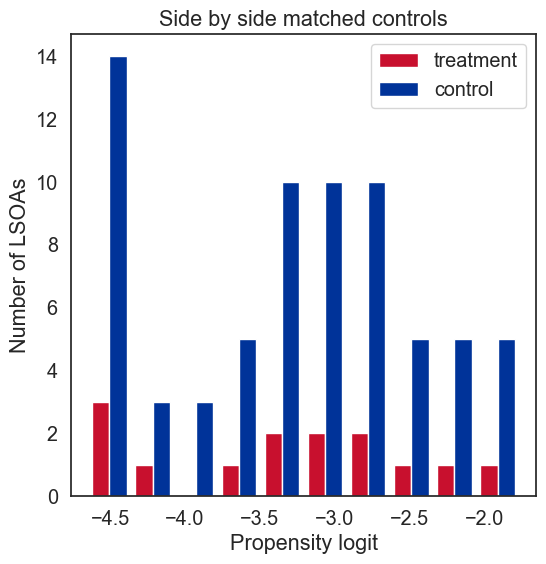

In [25]:
# distribution of lsoas by logit score, treatment and control
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of LSOAs', Xlabel= 'Propensity logit', names = ['treatment', 'control'], colors=['#C8102E', '#003399'] ,save=True)

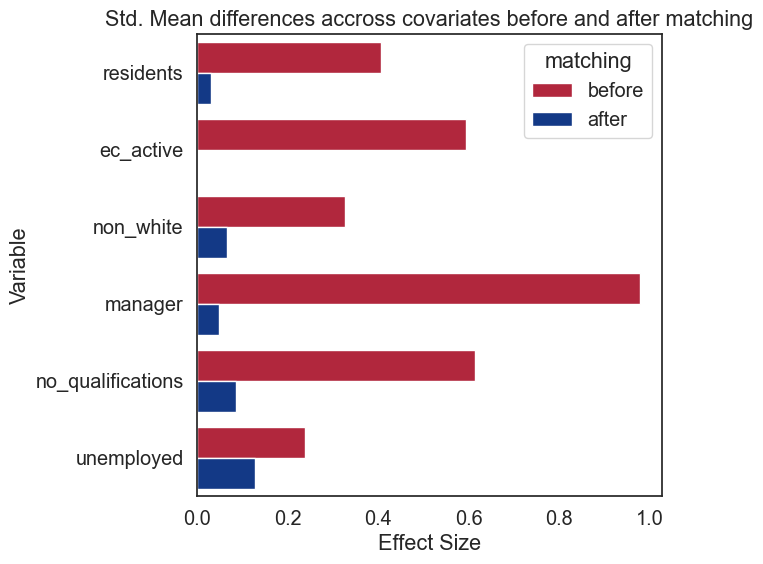

In [26]:
psm.effect_size_plot(title='Std. Mean differences accross covariates before and after matching', before_color='#C8102E', after_color='#003399', save=False)

In [28]:
psm.effect_size

,Variable,matching,Effect Size
0,residents,before,0.407191
1,residents,after,0.031522
2,ec_active,before,0.594305
3,ec_active,after,0.000879
4,non_white,before,0.327587
5,non_white,after,0.065791
6,manager,before,0.978042
7,manager,after,0.048917
8,no_qualifications,before,0.613183
9,no_qualifications,after,0.087091


#### 6. Exporting the data for further use

In [27]:
# view the matches
psm.matched_ids

,index,largerclass_0group,largerclass_1group,largerclass_2group,largerclass_3group,largerclass_4group
0,0,765,291,900,591,158
1,1,577,753,25,648,52
2,2,416,418,760,706,88
3,3,383,582,761,451,48
4,4,49,27,44,197,244
5,5,570,677,38,534,50
6,6,530,274,814,848,833
7,7,472,679,311,331,110
8,8,764,287,282,381,870
9,9,47,357,867,441,73


In [29]:
# add matches to dataframe
matches = psm.df_matched

# rejoin original dataset, for LSOA codes
matches = matches.merge(df_psm, left_on='index', right_on='index', how='left')

In [ ]:
# export if required
matches.to_csv(r'https://github.com/routineactivity/adhoc_notebooks/blob/main/chb_psm_scm/data/matches.csv', index=False)